In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2]:
data_file = "conso.txt"

In [3]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [4]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [5]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


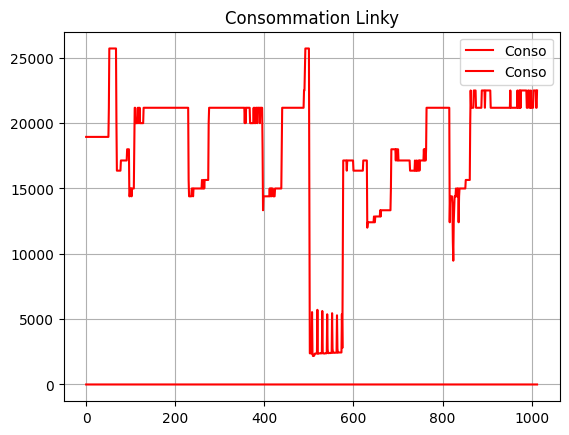

In [6]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [7]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [8]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74125 entries, 0 to 74124
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  74125 non-null  int64  
 1   kWh       74125 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [9]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
74120,23702,0.15
74121,23793,0.15
74122,22632,0.16
74123,22316,0.16


In [10]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
74120,23702,0.15,23.702,151.885917,1779814570
74121,23793,0.15,23.793,151.305006,1779838363
74122,22632,0.16,22.632,159.066808,1779860995
74123,22316,0.16,22.316,161.319233,1779883311


In [11]:
# index dernier echantillon
l=len(conso_data)-1
l

74124

In [12]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1779904969000

In [13]:
old

False

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 28, 34, 825893)

In [15]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74125 entries, 0 to 74124
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   74125 non-null  int64         
 1   kWh        74125 non-null  float64       
 2   sec        74125 non-null  float64       
 3   Wh         74125 non-null  float64       
 4   cumul(ms)  74125 non-null  int64         
 5   dates      74125 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.4 MB


In [16]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:29:01.114893,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:29:27.357893,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:29:53.242893,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:30:18.996893,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:30:44.770893,07/03/2024
...,...,...,...,...,...,...,...
74120,23702,0.15,23.702,151.885917,1779814570,2024-03-27 14:52:09.395893,27/03/2024
74121,23793,0.15,23.793,151.305006,1779838363,2024-03-27 14:52:33.188893,27/03/2024
74122,22632,0.16,22.632,159.066808,1779860995,2024-03-27 14:52:55.820893,27/03/2024
74123,22316,0.16,22.316,161.319233,1779883311,2024-03-27 14:53:18.136893,27/03/2024


In [17]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:29:01.114893   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh   cumul(ms)  \
 74124     21658  0.17  21.658  166.220334  1779904969   
 
                            dates        days  
 74124 2024-03-27 14:53:39.794893  27/03/2024  )

In [18]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'27/03/2024'

In [19]:
month, year

(3, 2024)

In [20]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour



In [21]:
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:prefd='0'
    else:prefd=''
    if month<10:prefm='0'
    else:prefm=''
    day = f'{prefd}{d}/{prefm}{month}/{year}'
    conso_graph.append((day,conso_by_day(day)))
    #print(day,conso_by_day(day))
conso_df = pd.DataFrame(conso_graph, columns=('day','conso'))
conso_df.set_index('day',inplace=True)
conso_df

,conso
day,
07/03/2024,3.329
08/03/2024,3.763
09/03/2024,3.059
10/03/2024,3.568
11/03/2024,4.528
12/03/2024,3.550
13/03/2024,3.508
14/03/2024,3.703
15/03/2024,3.544


In [22]:

mean = conso_df['conso'].mean()
mean

3.5297619047619047

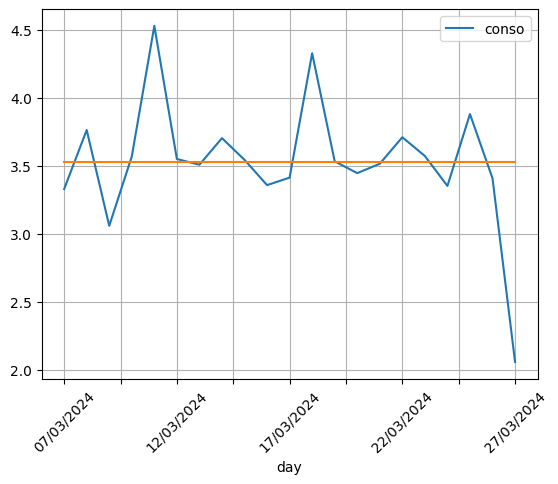

In [23]:
conso_df.plot()
plt.plot()
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [24]:
#manuel
#day = '25/03/2024'


In [25]:
# conso day
conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

2059

In [26]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:29,32292,0.11,32.292,111.482720,1726314200,2024-03-27 00:00:29.025893,27/03/2024
0:1:1,32148,0.11,32.148,111.982083,1726346348,2024-03-27 00:01:01.173893,27/03/2024
0:1:34,33257,0.11,33.257,108.247888,1726379605,2024-03-27 00:01:34.430893,27/03/2024
0:2:8,33700,0.11,33.700,106.824926,1726413305,2024-03-27 00:02:08.130893,27/03/2024
0:2:41,33609,0.11,33.609,107.114166,1726446914,2024-03-27 00:02:41.739893,27/03/2024
...,...,...,...,...,...,...,...
14:52:9,23702,0.15,23.702,151.885917,1779814570,2024-03-27 14:52:09.395893,27/03/2024
14:52:33,23793,0.15,23.793,151.305006,1779838363,2024-03-27 14:52:33.188893,27/03/2024
14:52:55,22632,0.16,22.632,159.066808,1779860995,2024-03-27 14:52:55.820893,27/03/2024


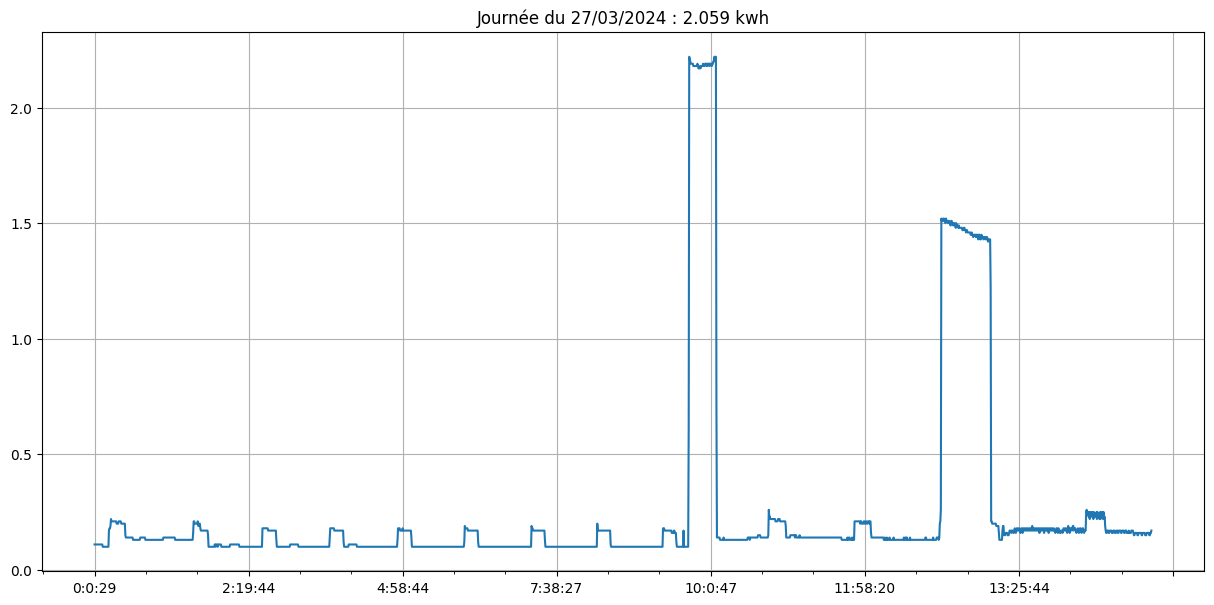

In [27]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

152

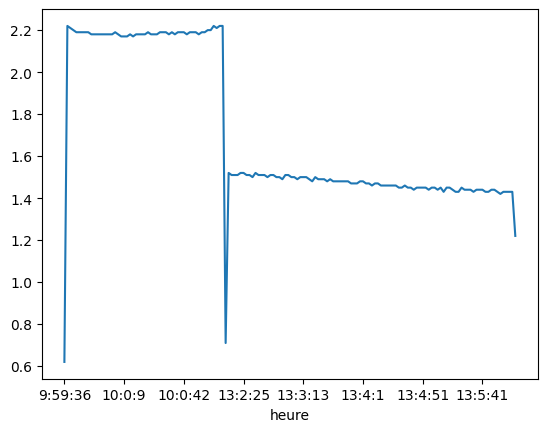

In [28]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

1215

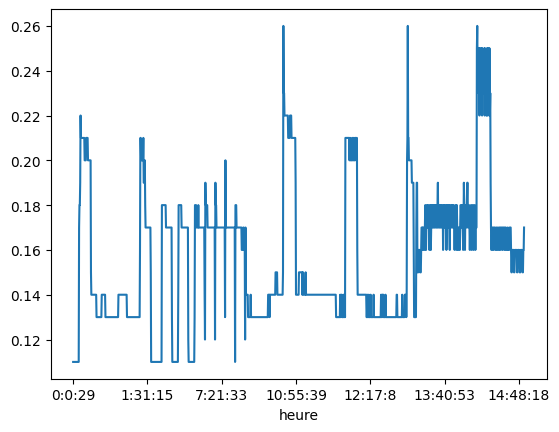

In [29]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1907

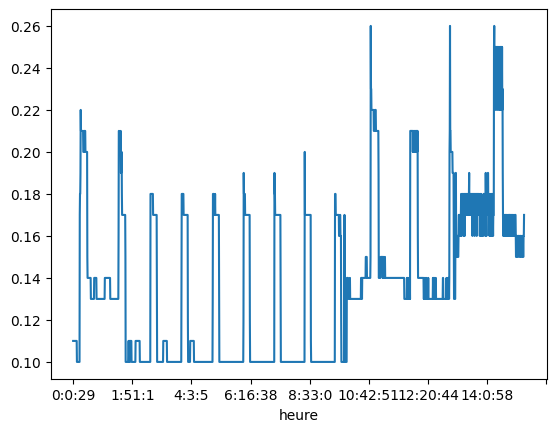

In [30]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [31]:
time = conso_data['dates']
time


0       2024-03-07 00:29:01.114893
1       2024-03-07 00:29:27.357893
2       2024-03-07 00:29:53.242893
3       2024-03-07 00:30:18.996893
4       2024-03-07 00:30:44.770893
                   ...            
74120   2024-03-27 14:52:09.395893
74121   2024-03-27 14:52:33.188893
74122   2024-03-27 14:52:55.820893
74123   2024-03-27 14:53:18.136893
74124   2024-03-27 14:53:39.794893
Name: dates, Length: 74125, dtype: datetime64[ns]

In [32]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [33]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [34]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

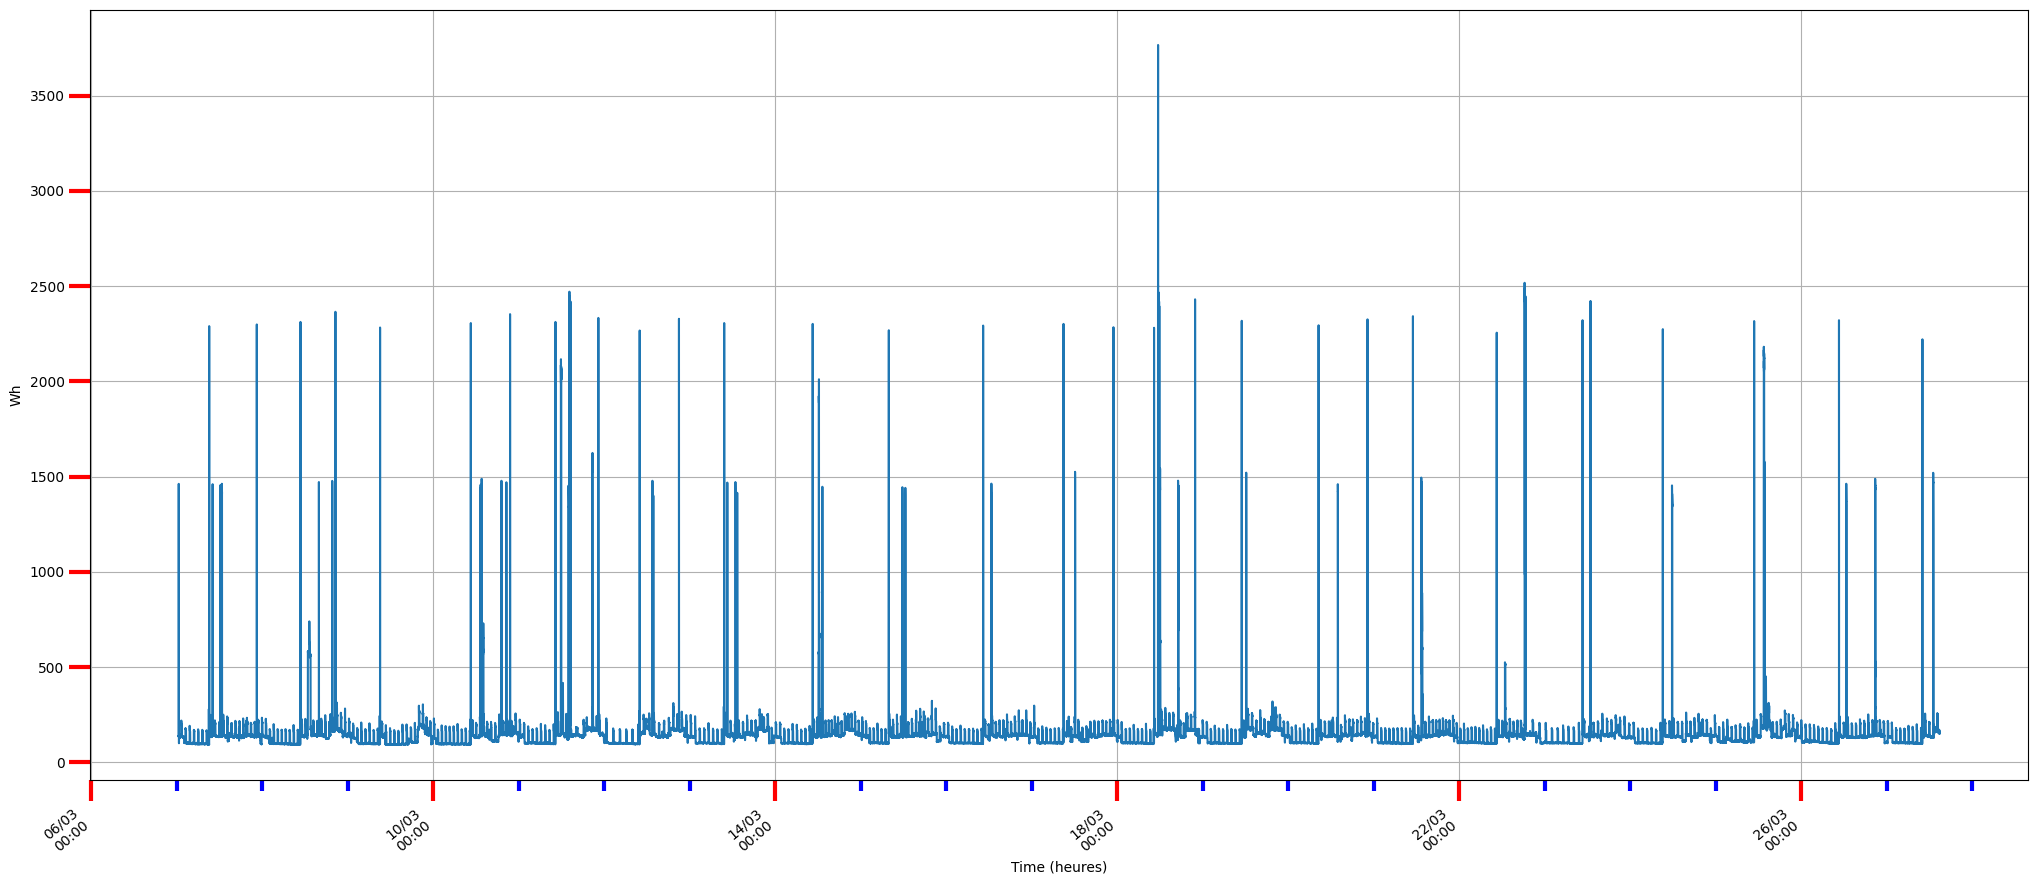

In [35]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [36]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
74124,21658,0.17,21.658,166.220334,1779904969,2024-03-27 14:53:39.794893,27/03/2024


In [37]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1779904969000

# Slice of last 1 kWh

In [38]:
l = len(conso_data)  # total watt consommés
l

74125

In [39]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(74125, 1000)

In [40]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [41]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 73125     35687  0.10  35.687  100.877070  1759137203   
 73126     35575  0.10  35.575  101.194659  1759172778   
 73127     35404  0.10  35.404  101.683426  1759208182   
 73128     36264  0.10  36.264   99.272005  1759244446   
 73129     36954  0.10  36.954   97.418412  1759281400   
 ...         ...   ...     ...         ...         ...   
 74120     23702  0.15  23.702  151.885917  1779814570   
 74121     23793  0.15  23.793  151.305006  1779838363   
 74122     22632  0.16  22.632  159.066808  1779860995   
 74123     22316  0.16  22.316  161.319233  1779883311   
 74124     21658  0.17  21.658  166.220334  1779904969   
 
                            dates        days  
 73125 2024-03-27 09:07:32.028893  27/03/2024  
 73126 2024-03-27 09:08:07.603893  27/03/2024  
 73127 2024-03-27 09:08:43.007893  27/03/2024  
 73128 2024-03-27 09:09:19.271893  27/03/2024  
 73129 2024-03-27 09:09:56.225893  27/03/2024  
 ...   

In [42]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [43]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [44]:
cumtime_end,cumtime_start

(1779904969000, 1759172778000)

In [45]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

20732191000

In [46]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 27, 14, 54, 7, 780486),
 datetime.datetime(2024, 3, 27, 9, 8, 35, 589486),
 '27/03/2024 14:53:39')

In [47]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:29:01.114893,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:29:27.357893,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:29:53.242893,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:30:18.996893,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:30:44.770893,07/03/2024
...,...,...,...,...,...,...,...
74120,23702,0.15,23.702,151.885917,1779814570,2024-03-27 14:52:09.395893,27/03/2024
74121,23793,0.15,23.793,151.305006,1779838363,2024-03-27 14:52:33.188893,27/03/2024
74122,22632,0.16,22.632,159.066808,1779860995,2024-03-27 14:52:55.820893,27/03/2024
74123,22316,0.16,22.316,161.319233,1779883311,2024-03-27 14:53:18.136893,27/03/2024


In [48]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('27/03/2024 09:08:07', '27/03/2024 14:53:39')

In [49]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-27 09:07:32.028893', '2024-03-27 14:53:39.794893')

In [50]:
k

1

In [51]:
data.Interval.tail(1000)

73125    35687
73126    35575
73127    35404
73128    36264
73129    36954
         ...  
74120    23702
74121    23793
74122    22632
74123    22316
74124    21658
Name: Interval, Length: 1000, dtype: int64

In [52]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(5.778736944444445, 4.153156689901431, 5, 46, 43)

In [53]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [54]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
73125,35687,0.10,35.687,100.877070,1759137203,2024-03-27 09:07:32.028893,27/03/2024,2024-03-27 09:07:32.028893
73126,35575,0.10,35.575,101.194659,1759172778,2024-03-27 09:08:07.603893,27/03/2024,2024-03-27 09:08:07.603893
73127,35404,0.10,35.404,101.683426,1759208182,2024-03-27 09:08:43.007893,27/03/2024,2024-03-27 09:08:43.007893
73128,36264,0.10,36.264,99.272005,1759244446,2024-03-27 09:09:19.271893,27/03/2024,2024-03-27 09:09:19.271893
73129,36954,0.10,36.954,97.418412,1759281400,2024-03-27 09:09:56.225893,27/03/2024,2024-03-27 09:09:56.225893
...,...,...,...,...,...,...,...,...
74120,23702,0.15,23.702,151.885917,1779814570,2024-03-27 14:52:09.395893,27/03/2024,2024-03-27 14:52:09.395893
74121,23793,0.15,23.793,151.305006,1779838363,2024-03-27 14:52:33.188893,27/03/2024,2024-03-27 14:52:33.188893
74122,22632,0.16,22.632,159.066808,1779860995,2024-03-27 14:52:55.820893,27/03/2024,2024-03-27 14:52:55.820893
74123,22316,0.16,22.316,161.319233,1779883311,2024-03-27 14:53:18.136893,27/03/2024,2024-03-27 14:53:18.136893


<Axes: >

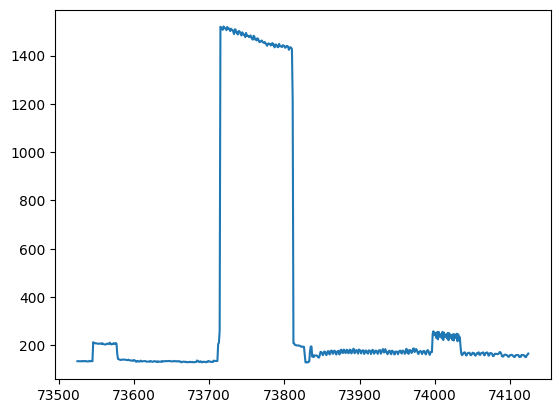

In [55]:
data.tail(600)['Wh'].plot()

In [56]:
data['Wh']

73125    100.877070
73126    101.194659
73127    101.683426
73128     99.272005
73129     97.418412
            ...    
74120    151.885917
74121    151.305006
74122    159.066808
74123    161.319233
74124    166.220334
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

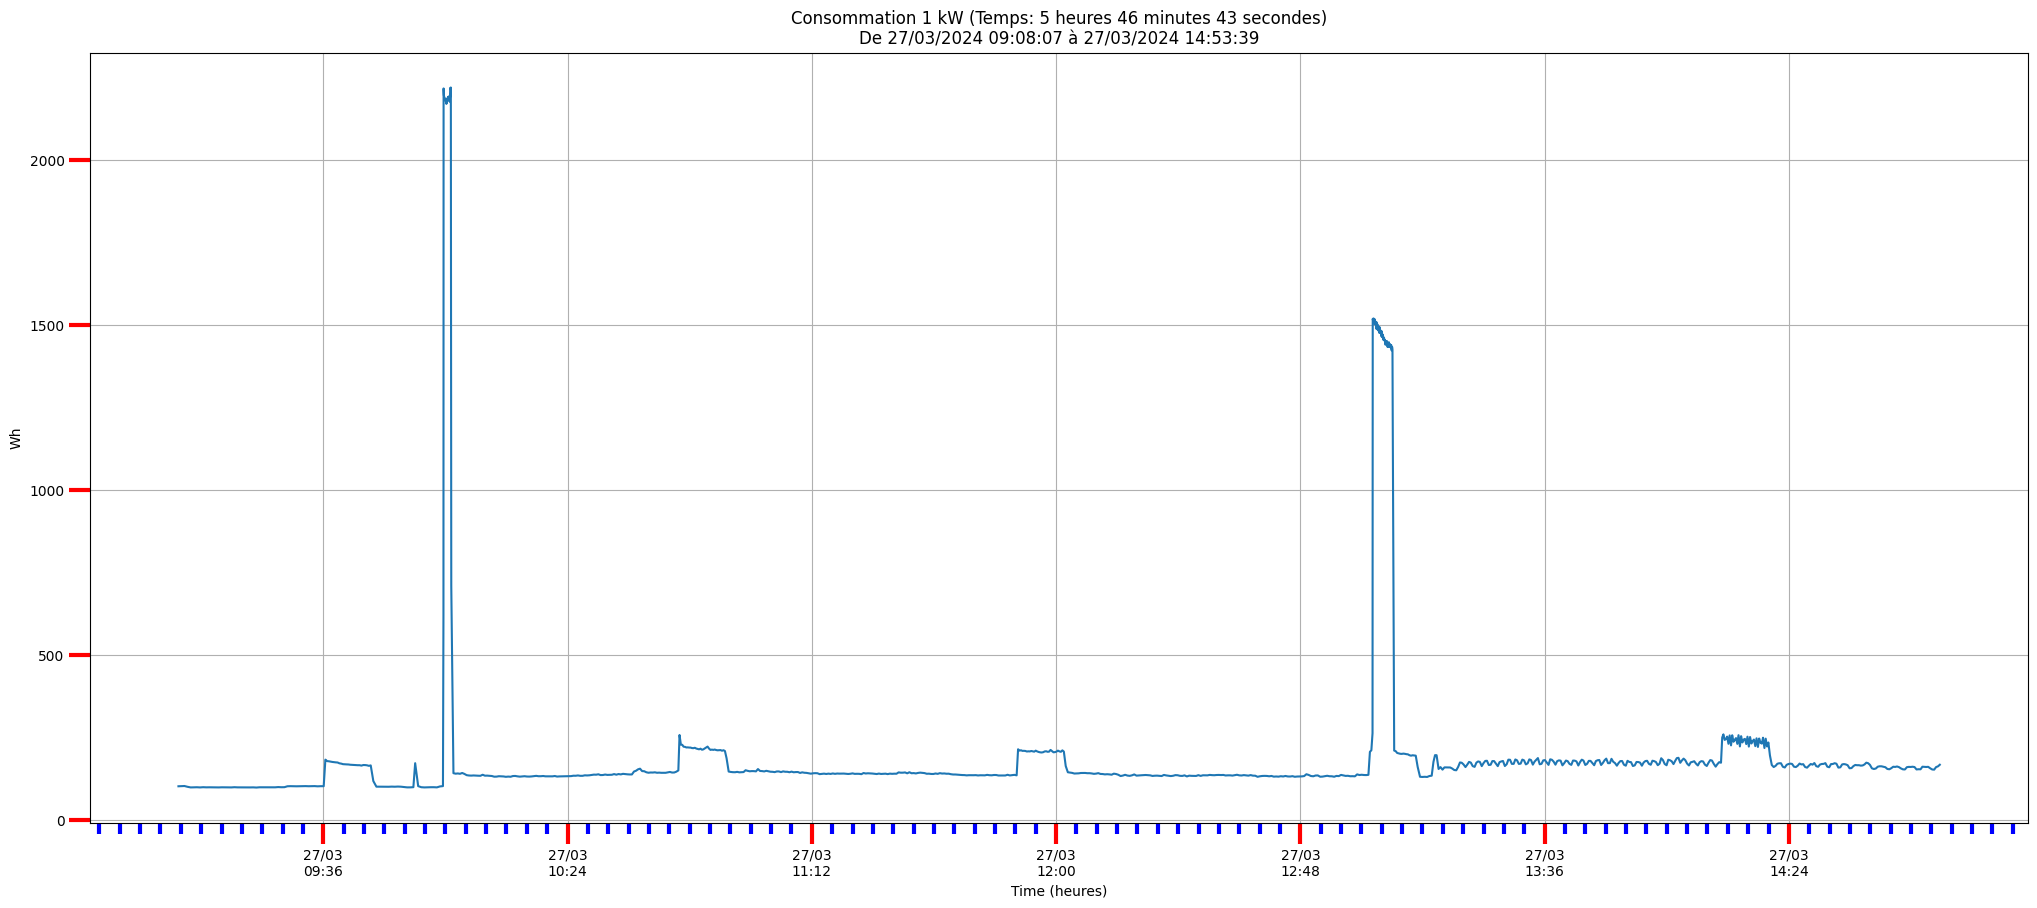

In [57]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

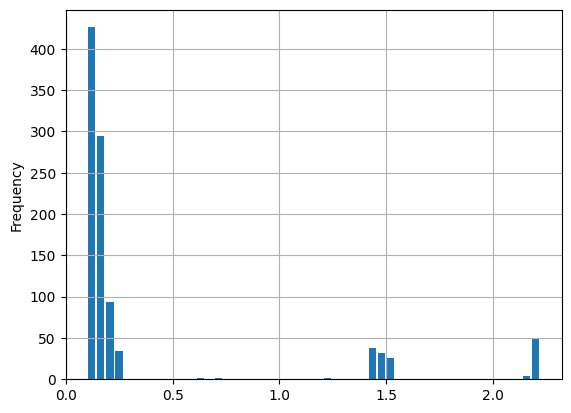

In [58]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [59]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
74120,23702,0.15,23.702,151.885917,1779814570,2024-03-27 14:52:09.395893,27/03/2024
74121,23793,0.15,23.793,151.305006,1779838363,2024-03-27 14:52:33.188893,27/03/2024
74122,22632,0.16,22.632,159.066808,1779860995,2024-03-27 14:52:55.820893,27/03/2024
74123,22316,0.16,22.316,161.319233,1779883311,2024-03-27 14:53:18.136893,27/03/2024
74124,21658,0.17,21.658,166.220334,1779904969,2024-03-27 14:53:39.794893,27/03/2024


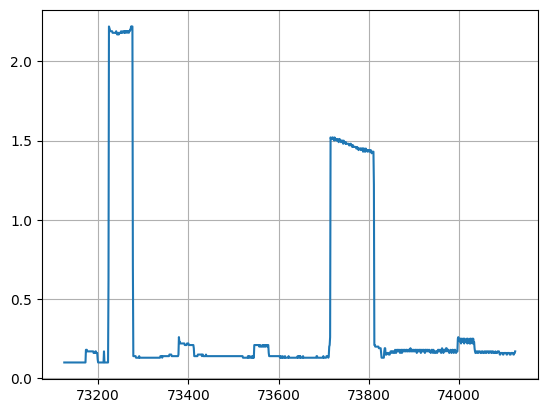

In [60]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [61]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1779904969000.0, 29665.082816666665)

In [62]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 27, 14, 54, 16, 163938),
 datetime.datetime(2024, 3, 7, 0, 29, 11, 194938))

In [63]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(74125, 1779905, 494.41805555555555)

In [64]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [65]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [66]:
732/12 # 60 jours

61.0

In [67]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

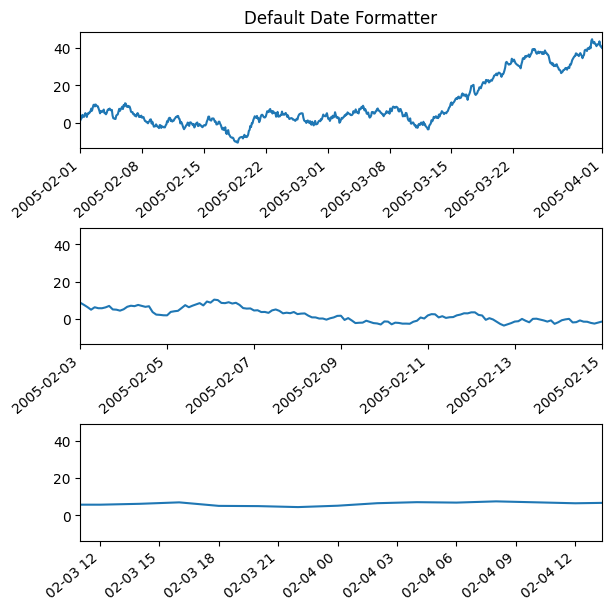

In [68]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [69]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)